In [1]:
# Input variables
cost_of_ice_bag = 1.25
profit_margin = .2
number_of_bags = 500

# Template for output message
output_template = """If a grocery store sells ice bags at $ {} per bag, with a profit margin of {} %, 
then the total profit it makes by selling {} ice bags is $ {}."""

print(output_template)

If a grocery store sells ice bags at $ {} per bag, with a profit margin of {} %, 
then the total profit it makes by selling {} ice bags is $ {}.


In [2]:
# Inserting values into the string
total_profit = cost_of_ice_bag * profit_margin * number_of_bags

output_message = output_template.format(cost_of_ice_bag, profit_margin*100, number_of_bags, total_profit)

print(output_message)

If a grocery store sells ice bags at $ 1.25 per bag, with a profit margin of 20.0 %, 
then the total profit it makes by selling 500 ice bags is $ 125.0.


In [3]:
for i in range(5):
    for j in range(i+1):
        print("*",end="")
    print()

*
**
***
****
*****


In [4]:
n = 6

# Top half of the diamond including the middle line
for i in range(n):
    for j in range(n - i - 1):
        print(" ", end="")
    for k in range(2 * i + 1):
        print("*", end="")
    print()

# Bottom half of the diamond
for i in range(n - 1):
    for j in range(i + 1):
        print(" ", end="")
    for k in range(2 * (n - i - 2) + 1):
        print("*", end="")
    print()

     *
    ***
   *****
  *******
 *********
***********
 *********
  *******
   *****
    ***
     *


### problem
Radha is planning to buy a house that costs $1,260,000. She considering two options to finance her purchase:

Option 1: Make an immediate down payment of $300,000, and take loan 8-year loan with an interest rate of 10% (compounded monthly) for the remaining amount. Option 2: Take a 10-year loan with an interest rate of 8% (compounded monthly) for the entire amount. Both these loans have to be paid back in equal monthly installments (EMIs). Which loan has a lower EMI among the two?

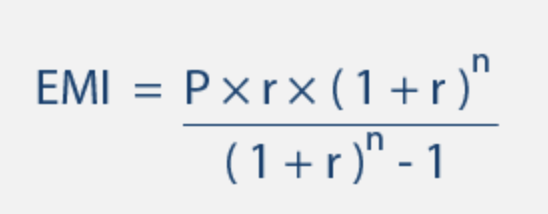

In [9]:
import math
def loan_emi(amount, duration, rate, down_payment=0):
    loan_amount = amount - down_payment
    try:
        emi = loan_amount * rate * ((1+rate)**duration) / (((1+rate)**duration)-1)
    except ZeroDivisionError:
        emi = loan_amount / duration
    emi = math.ceil(emi)
    return emi

In [10]:
emi1 = loan_emi(
    amount=1260000, 
    duration=8*12, 
    rate=0.1/12, 
    down_payment=300000
)

In [11]:
emi2 = loan_emi(amount=1260000, duration=10*12, rate=0.08/12)

In [12]:
if emi1 < emi2:
    print("Option 1 has the lower EMI: ${}".format(emi1))
else:
    print("Option 2 has the lower EMI: ${}".format(emi2))

Option 1 has the lower EMI: $14568


### problem
Shaun is currently paying back a home loan for a house he bought a few years ago. The cost of the house was 800,000. Shaun made a down payment of 25% of the price. He financed the remaining amount using a 6-year loan with an interest rate of 7% per annum (compounded monthly). Shaun is now buying a car worth $60,000, which he is planning to finance using a 1-year loan with an interest rate of 12% per annum. Both loans are paid back in EMIs. What is the total monthly payment Shaun makes towards loan repayment?

In [13]:
cost_of_house = 800000
home_loan_duration = 6*12 # months
home_loan_rate = 0.07/12 # monthly
home_down_payment = .25 * 800000

emi_house = loan_emi(amount=cost_of_house,
                     duration=home_loan_duration,
                     rate=home_loan_rate, 
                     down_payment=home_down_payment)

emi_house

10230

In [14]:
cost_of_car = 60000
car_loan_duration = 1*12 # months
car_loan_rate = .12/12 # monthly

emi_car = loan_emi(amount=cost_of_car, 
                   duration=car_loan_duration, 
                   rate=car_loan_rate)

emi_car

5331

In [15]:
print("Shaun makes a total monthly payment of ${} towards loan repayments.".format(emi_house+emi_car))

Shaun makes a total monthly payment of $15561 towards loan repayments.



## Exercise - Data Analysis for Vacation Planning

You're planning a vacation, and you need to decide which city you want to visit. You have shortlisted four cities and identified the return flight cost, daily hotel cost, and weekly car rental cost. While renting a car, you need to pay for entire weeks, even if you return the car sooner.


| City | Return Flight (`$`) | Hotel per day (`$`) | Weekly Car Rental  (`$`) | 
|------|--------------------------|------------------|------------------------|
| Paris|       200                |       20         |          200           |
| London|      250                |       30         |          120           |
| Dubai|       370                |       15         |          80           |
| Mumbai|      450                |       10         |          70           |         


Answer the following questions using the data above:

1. If you're planning a 1-week long trip, which city should you visit to spend the least amount of money?
2. How does the answer to the previous question change if you change the trip's duration to four days, ten days or two weeks?
3. If your total budget for the trip is `$1000`, which city should you visit to maximize the duration of your trip? Which city should you visit if you want to minimize the duration?
4. How does the answer to the previous question change if your budget is `$600`, `$2000`, or `$1500`?

*Hint: To answer these questions, it will help to define a function `cost_of_trip` with relevant inputs like flight cost, hotel rate, car rental rate, and duration of the trip. You may find the `math.ceil` function useful for calculating the total cost of car rental.*

In [1]:
# this is complete solution
import math

Paris=[200,20,200,'Paris']
London = [250,30,120,'London']
Dubai = [370,15,80,'Dubai']
Mumbai = [450,10,70,'Mumbai']
Cities = [Paris,London,Dubai,Mumbai]

def cost_of_trip(flight,hotel_cost,car_rent,num_of_days=0):
    return flight+(hotel_cost*num_of_days)+(car_rent*math.ceil(num_of_days/7))

def days_to_visit(days):
    costs=[]
    for city in Cities:
        cost=cost_of_trip(city[0],city[1],city[2],days)
        costs.append((cost,city[3]))
    min_cost = min(costs)
    return min_cost

def given_budget(budget,less_days=False):
    days=1
    cost=0
    while cost<budget:
        #copy of city cost 
        cost_before=cost
        try:
            #copy of costs dictionary, if exists
            costs_before=costs.copy()
        except:
            #if costs dictionary doesn't exist, create an empty dictionary
            costs_before={}
        costs={}
        for city in Cities:
            cost = cost_of_trip(city[0],city[1],city[2],days)
            costs[cost] = city[3]
        if less_days:
            cost=max(list(costs.keys()))
            ''' The while loop breaks only after cost>600 condition is met.
            when the condition is met, the costs dictionary updates to values that are greater than 600 
            so we check if it is exceeding, if it does, we return the values from the previous dictionary cost_before. '''
            if cost>=budget:
                return costs_before[cost_before],days-1
        else:   
            cost=min(list(costs.keys()))
            if cost>=budget:
                return costs_before[cost_before],days-1
        days+=1

In [5]:
days_to_visit(7)

(540, 'Paris')

In [6]:
city_to_stay_maximum_days=given_budget(600)

In [7]:
print(city_to_stay_maximum_days)


('Paris', 7)


In [11]:
city_to_stay_minimum_days=given_budget(600,less_days=True)


In [ ]:
print(city_

In [2]:
# this is different solution but this is for only 1-2 ques
import math

def vacation_planning(duration=0, budget=0):
    city1 = { "city":"Paris" , "return_flight":200 , "hotel_per_day":20 , "weekly_car_rental":200}
    city2 = { "city":"London" , "return_flight":250 , "hotel_per_day":30 , "weekly_car_rental":120}
    city3 = { "city":"Dubai" , "return_flight":370 , "hotel_per_day":15 , "weekly_car_rental":80}
    city4 = { "city":"Mumbai" , "return_flight":450 , "hotel_per_day":10 , "weekly_car_rental":70}

    cities= [city1, city2, city3, city4]

    costs = []  # List to store total costs for each city

    for city in cities:
        if duration == 7:
            result = (city["return_flight"]) + (city["hotel_per_day"] * duration) + (city["weekly_car_rental"])
        else:
            weekly_car_rental_daily = math.ceil(city["weekly_car_rental"] / 7)
            result = (city["return_flight"]) + (city["hotel_per_day"] * duration) + (weekly_car_rental_daily * duration)
        
        costs.append(result)  # Append total cost to the list
        print(f"Total cost for {city['city']} is: {result}")

    # Find the city with the minimum total cost
    min_cost_index = costs.index(min(costs))
    min_cost_city = cities[min_cost_index]["city"]
    min_cost_value = min(costs)
    print(f"\nCity with the minimum total cost: {min_cost_city} (${min_cost_value})")


In [4]:
vacation_planning(duration=7)

Total cost for Paris is: 540
Total cost for London is: 580
Total cost for Dubai is: 555
Total cost for Mumbai is: 590

City with the minimum total cost: Paris ($540)
